In [50]:
import pandas as pd
import numpy as np
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt

In [34]:
bottle = pd.read_csv("datasets/bottle.csv")
cast = pd.read_csv("datasets/cast.csv")

/tmp/ipykernel_13299/4250220369.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle = pd.read_csv("datasets/bottle.csv")
/tmp/ipykernel_13299/4250220369.py:2: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast = pd.read_csv("datasets/cast.csv")


In [35]:
bottle = bottle.sample(n=10000, random_state=42)

In [36]:
pd.concat([bottle.head().transpose(), bottle.dtypes.to_frame().rename(columns={0:"dtype"})], axis=1).to_csv("exploring_dtypes.csv")

In [61]:
bottle_corr = bottle.corr(numeric_only = True)

In [68]:
bottle_corr = pd.DataFrame(np.tril(bottle_corr, k=-1), columns = bottle_corr.columns, index= bottle_corr.columns)

In [69]:
bottle_corr = bottle_corr.abs()

In [70]:
bottle_corr.to_csv("bottle_correlation.csv")

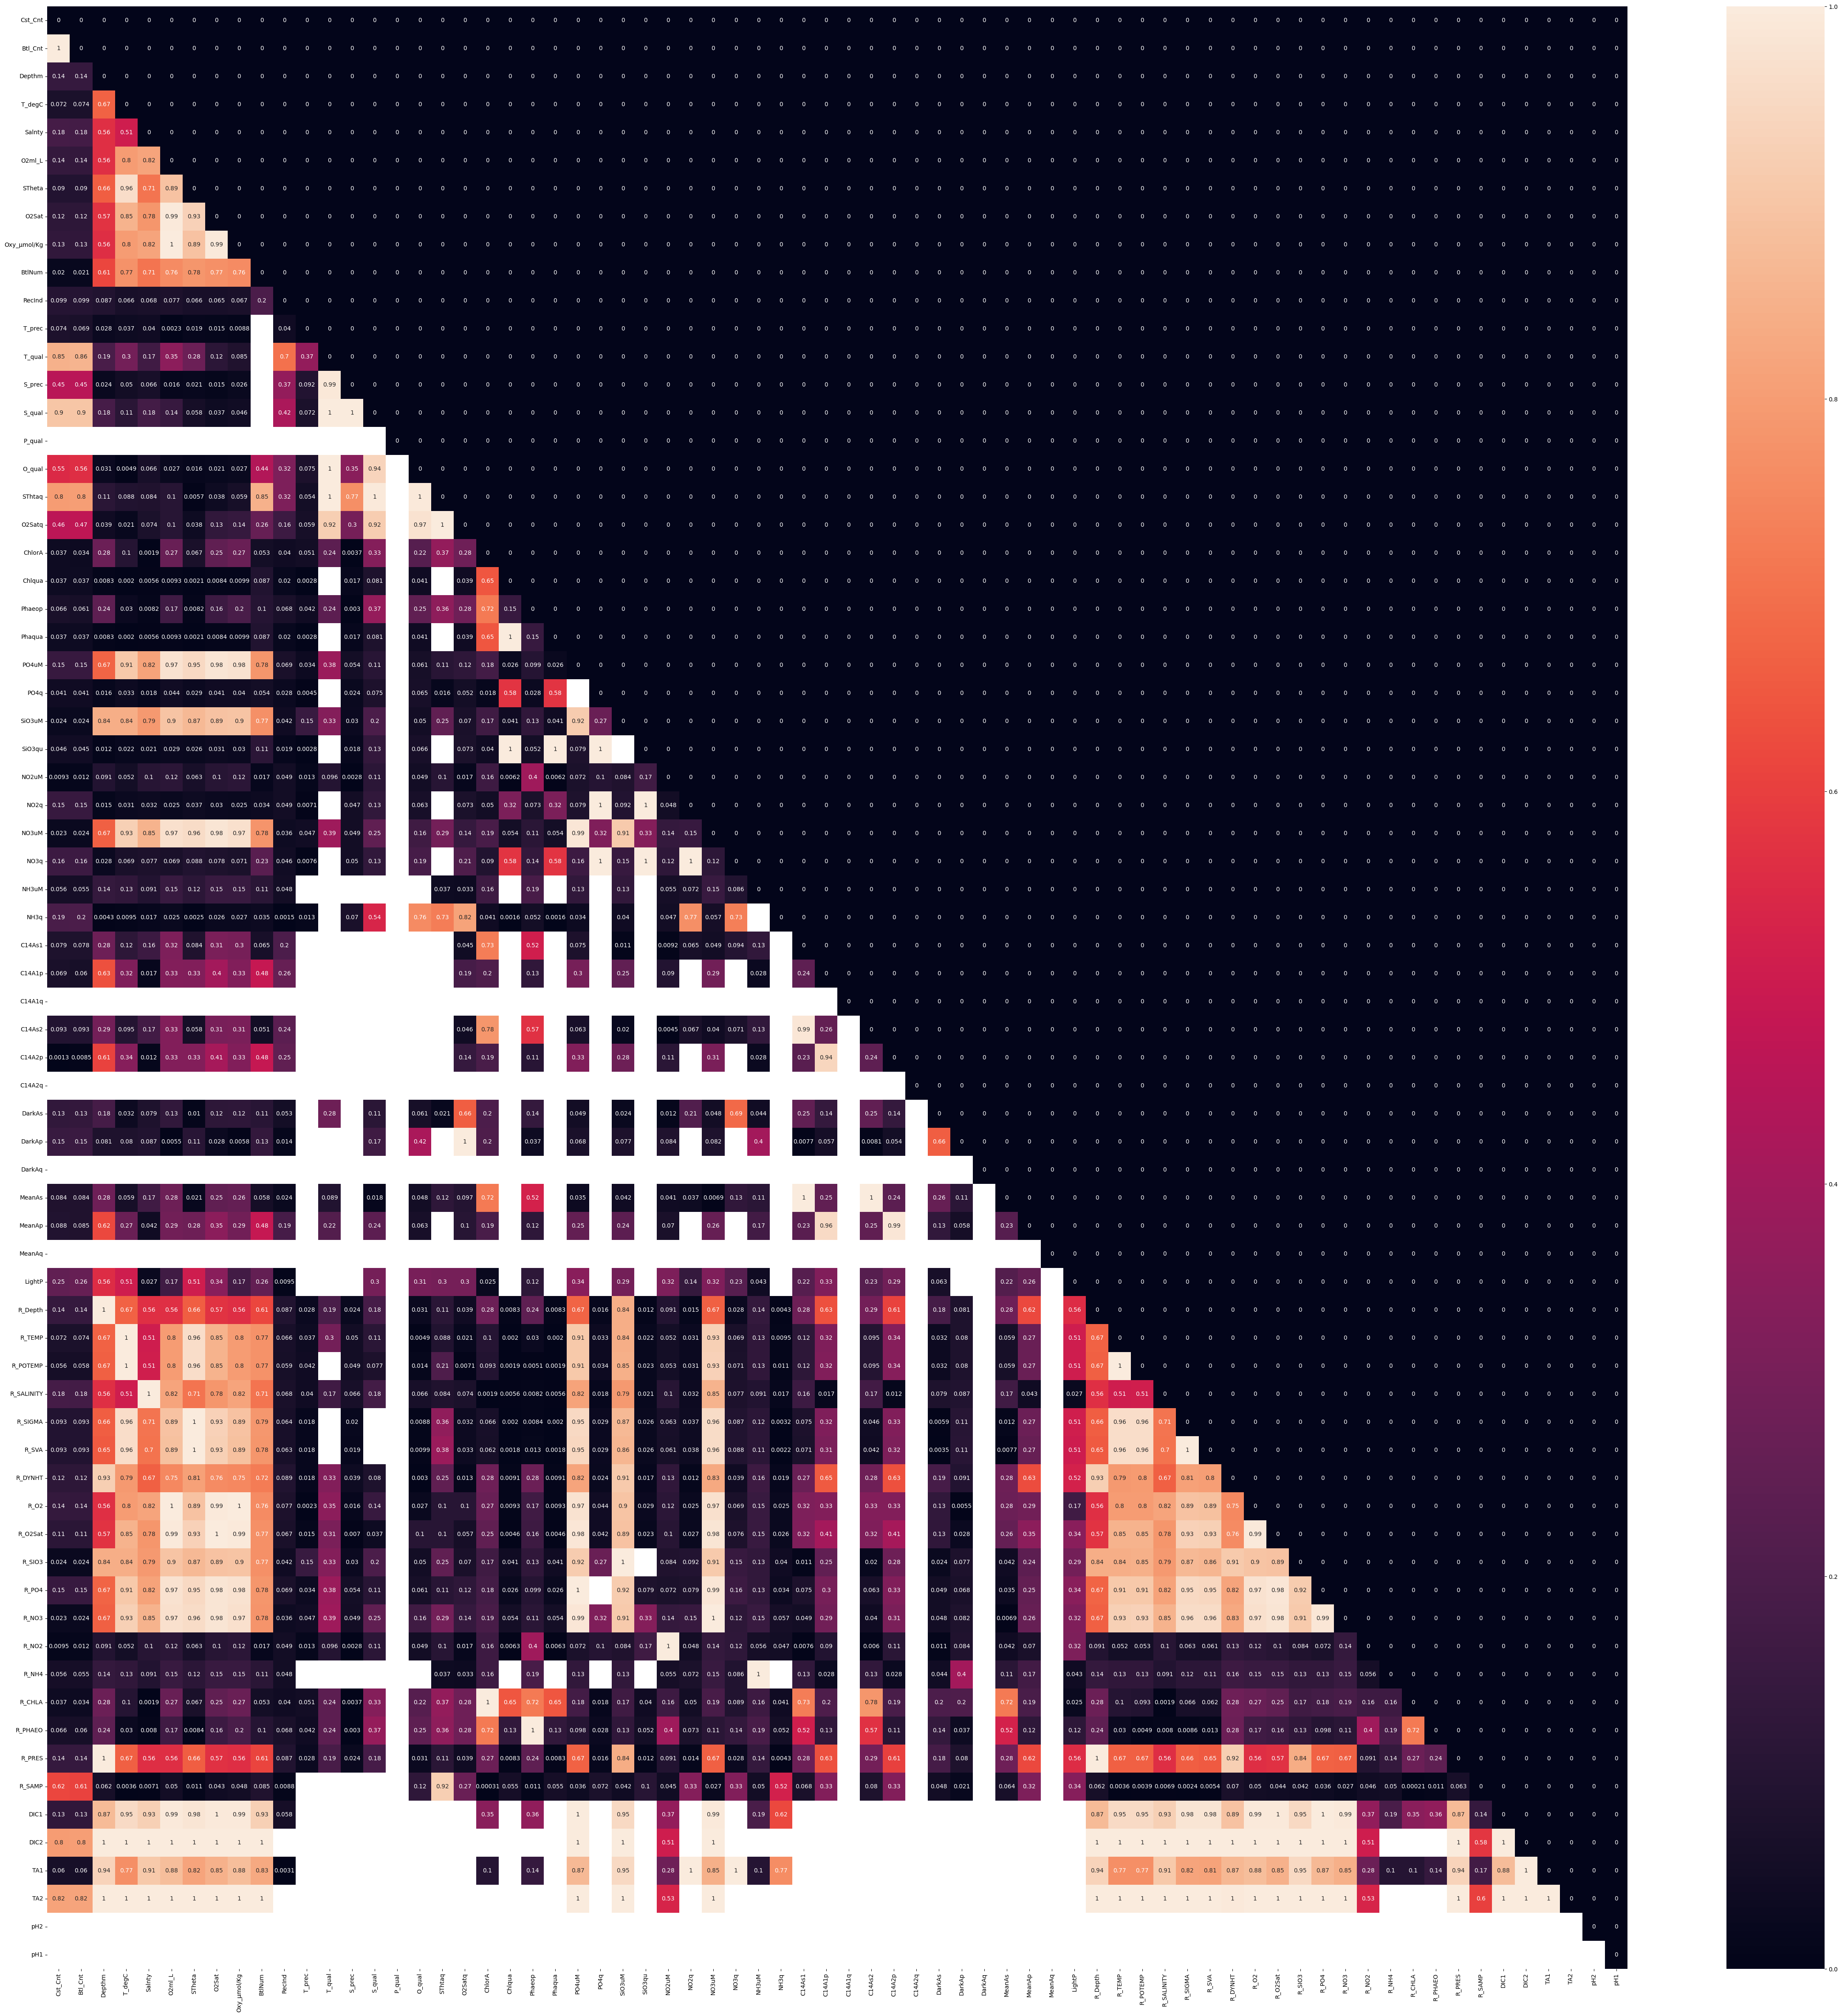

In [71]:
plt.figure(figsize=(60,60))
sns.heatmap(bottle_corr, annot=True)
plt.savefig("output.png")

In [72]:
correlations_1d = dict()

In [76]:
for c in bottle_corr.columns:
    for i in bottle_corr.index:
        correlations_1d[f"{c}, {i}"] = bottle_corr.loc[i,c]

In [83]:
correlations_id_df = pd.DataFrame.from_dict(correlations_1d, orient='index').sort_values(by=0, ascending=False).dropna()

In [90]:
correlations_id_df = correlations_id_df[correlations_id_df > 0].dropna()

array([[<Axes: title={'center': '0'}>]], dtype=object)

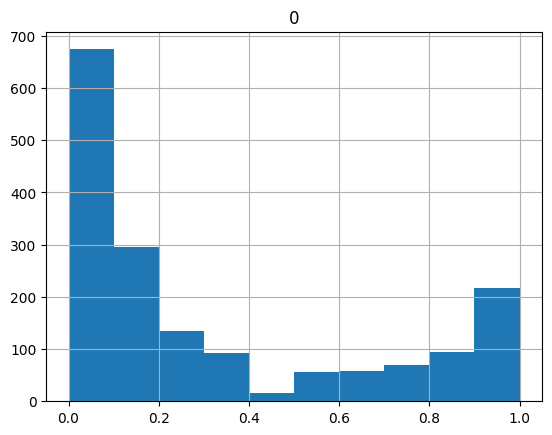

In [92]:
correlations_id_df.hist()

In [93]:
strong_corr = correlations_id_df[correlations_id_df >= 0.4].dropna()

In [96]:
strong_corr

,0
"O2Satq, DarkAp",1.000000
"NO3q, TA1",1.000000
"NH3uM, R_NH4",1.000000
"SiO3qu, NO2q",1.000000
"SiO3qu, NO3q",1.000000
...,...
"O2Sat, C14A2p",0.410410
"C14A1p, R_O2Sat",0.407218
"NH3uM, DarkAp",0.404720
"DarkAp, R_NH4",0.404720
